In [1]:
# K-Means Clustering
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

In [2]:
audio_features = pd.read_csv('audio_features.csv')
top200 = pd.read_csv('Listas.csv')

In [3]:
audio_features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4.399000e+03,4399.000000
mean,0.680125,0.646061,5.424642,-6.538085,0.562401,0.116357,0.276693,0.007964,0.179661,0.525453,121.342378,2.141793e+05,3.976131
std,0.138359,0.164395,3.590725,2.388598,0.496147,0.108137,0.244853,0.061715,0.149982,0.217144,28.900121,5.329166e+04,0.251640
min,0.116000,0.054900,0.000000,-23.666000,0.000000,0.022800,0.000025,0.000000,0.016100,0.036900,48.718000,6.374300e+04,1.000000
25%,0.590000,0.538000,2.000000,-7.873500,0.000000,0.039450,0.070850,0.000000,0.094600,0.356000,97.978000,1.824580e+05,4.000000
50%,0.696000,0.662000,6.000000,-6.249000,1.000000,0.066700,0.206000,0.000000,0.121000,0.523000,120.010000,2.070200e+05,4.000000
75%,0.782000,0.767000,8.000000,-4.904500,1.000000,0.163000,0.428000,0.000015,0.204000,0.698000,139.973000,2.374585e+05,4.000000
max,0.978000,0.988000,11.000000,0.302000,1.000000,0.856000,0.989000,0.966000,0.990000,0.982000,230.186000,1.787030e+06,5.000000


In [4]:
t200 = top200.merge(audio_features,how='left',left_on='Track Id',right_on='id').iloc[:,5:20]
t100 = top200.loc[top200['Position']<101,:].merge(audio_features,how='left',left_on='Track Id',right_on='id').iloc[:,5:20]
t50 = top200.loc[top200['Position']<51,:].merge(audio_features,how='left',left_on='Track Id',right_on='id').iloc[:,5:20]
t10 = top200.loc[top200['Position']<11,:].merge(audio_features,how='left',left_on='Track Id',right_on='id').iloc[:,5:20]


# top200

In [5]:
df = t200.groupby(by='Country').mean().iloc[:,[0,1,9]]

In [6]:
# Importing the dataset
X = df.values

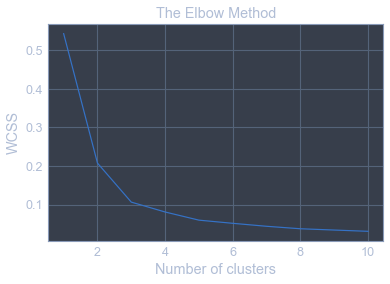

In [7]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++') #random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [9]:
pr = list(y_kmeans)
cero = 0
one = 0
two = 0
for i in pr:
    if i == 0:
        cero += 1
    elif i == 1:
        one += 1
    else:
        two += 1
print(f'0:{cero}  1:{one}  2:{two}')


0:19  1:45  2:0


# top100

In [6]:
df = t100.groupby(by='Country').mean().iloc[:,[0,1,9]]

In [7]:
# Importing the dataset
X = df.values

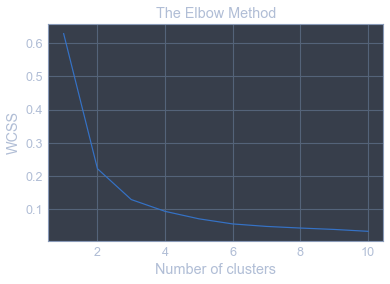

In [8]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++') #random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [10]:
pr = list(y_kmeans)
cero = 0
one = 0
two = 0
for i in pr:
    if i == 0:
        cero += 1
    elif i == 1:
        one += 1
    else:
        two += 1
print(f'0:{cero}  1:{one}  2:{two}')

    

0:20  1:12  2:32


In [13]:
countries = df.reset_index()
countries['cluster'] = pr

In [19]:
cluster = countries[['Country','cluster']]
cluster.to_csv('cluster.csv',index=False)

# top50

In [15]:
df = t50.groupby(by='Country').mean().iloc[:,[0,1,9]]

In [16]:
# Importing the dataset
X = df.values

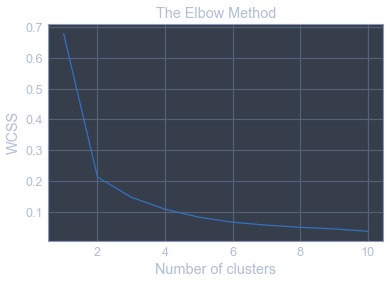

In [17]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++') #random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [19]:
pr = list(y_kmeans)
cero = 0
one = 0
two = 0
for i in pr:
    if i == 0:
        cero += 1
    elif i == 1:
        one += 1
    else:
        two += 1
print(f'0:{cero}  1:{one}  2:{two}')

    

0:21  1:43  2:0


# top10

In [21]:
df = t10.groupby(by='Country').mean().iloc[:,[0,1,9]]

In [22]:
# Importing the dataset
X = df.values

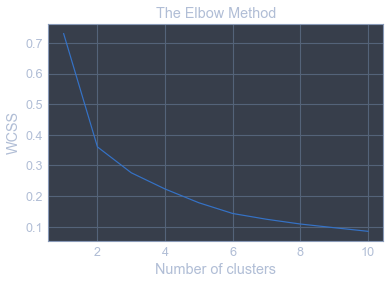

In [23]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++') #random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [27]:
pr = list(y_kmeans)
cero = 0
one = 0
two = 0
for i in pr:
    if i == 0:
        cero += 1
    elif i == 1:
        one += 1
    else:
        two += 1
print(f'0:{cero}  1:{one}  2:{two}')

    

0:29  1:35  2:0


In [ ]:
# # Visualising the clusters
# plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
# plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# #plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# #plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of customers')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.legend()
# plt.show()


# Importing the dataset
# y = dataset.iloc[:, 3].values
# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""